# P4

# Prutha Dolia

In this assignment, we'll look at some of the patterns in tweets by the Washington Nationals.

First, let's get our imports and system set up. 

In [119]:
import math
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Getting Some Data 

Since we'll be looking at Twitter data, we need to download the data from Twitter!

Twitter provides an API for downloading tweet data in large batches.  The `tweepy` package makes it fairly easy to use.

## Question 0 

You need to install `tweepy`. 

Using the Anaconda Prompt you can install `tweepy` with the following command. 

```bash 
conda install -c conda-forge tweepy
```


Instructions on using tweepy is available [here](https://tweepy.readthedocs.io/en/v3.5.0/index.html), but you will also get some example code.

Twitter requires you to have authentication keys to access their API. To get your keys, you'll have to sign up as a Twitter developer.

<span style="color:red">*Note, it may take over a day for your Twitter developer account to be approved, make sure to give yourself time to complete the assignment.*</span>

## Question 1 

Follow these instructions to get your keys:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.  You can indicate that you are a students and this is to be used for educational purposes. 
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file `keys.json` and replace the placeholders with your keys.  **Don't turn in that file.**

## IMPORTANT NOTE.  DO NOT SKIP ME.

If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**.  The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.

## SECOND IMPORTANT NOTE

Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  You are provided templates to help you do that.

### Example code 

In the example below, load some tweets by @packers. Run it, inspect the output, and read the code.

In [120]:
ds_tweets_save_path = "Packers_recent_tweets.pkl"
from pathlib import Path
# Guarding against attempts to download the data multiple times:
if not Path(ds_tweets_save_path).is_file():
    import json
    # Loading your keys from keys.json (which you should have filled
    # in in question 1):
    with open("keys.json") as f:
        keys = json.load(f)

    import tweepy

    # Authenticating:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    # Getting as many recent tweets by @packers as Twitter will let us have:
    example_tweets = list(tweepy.Cursor(api.user_timeline, id="packers").items())

    # Saving the tweets to a file as "pickled" objects:
    with open(ds_tweets_save_path, "wb") as f:
        import pickle
        pickle.dump(example_tweets, f)

# Re-loading the results:
with open(ds_tweets_save_path, "rb") as f:
    import pickle
    example_tweets = pickle.load(f)

Inspect several of the tweet objects, see what form they take what information is stored, where is it stored. 

In [3]:
# Looking at one tweet object, which has type Status:
example_tweets[0]

Status(_json={'created_at': 'Fri Nov 01 23:47:10 +0000 2019', 'id': 1190415013573537792, 'id_str': '1190415013573537792', 'text': 'Another week, another sombrero for @Showtyme_33! \n\n#GBvsLAC | #GoPackGo https://t.co/HZql7ZK6pE', 'truncated': False, 'entities': {'hashtags': [{'text': 'GBvsLAC', 'indices': [51, 59]}, {'text': 'GoPackGo', 'indices': [62, 71]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Showtyme_33', 'name': 'Aaron Jones 3️⃣3️⃣', 'id': 412032884, 'id_str': '412032884', 'indices': [35, 47]}], 'urls': [], 'media': [{'id': 1190414938990370817, 'id_str': '1190414938990370817', 'indices': [72, 95], 'media_url': 'http://pbs.twimg.com/media/EIU0FHXW4AER9KW.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EIU0FHXW4AER9KW.jpg', 'url': 'https://t.co/HZql7ZK6pE', 'display_url': 'pic.twitter.com/HZql7ZK6pE', 'expanded_url': 'https://twitter.com/packers/status/1190415013573537792/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small

Understanding the tweets is hard, let's try another way to make this a bit easier to read. 

In [121]:
import pprint
pprint.pprint(vars(example_tweets[0]))

{'_json': {'contributors': None,
           'coordinates': None,
           'created_at': 'Thu Oct 31 02:17:08 +0000 2019',
           'entities': {'hashtags': [{'indices': [81, 89], 'text': 'Packers'}],
                        'symbols': [],
                        'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                                  'expanded_url': 'https://twitter.com/i/web/status/1189727976302239750',
                                  'indices': [117, 140],
                                  'url': 'https://t.co/vAKPfzYYxB'}],
                        'user_mentions': []},
           'favorite_count': 318,
           'favorited': False,
           'geo': None,
           'id': 1189727976302239750,
           'id_str': '1189727976302239750',
           'in_reply_to_screen_name': None,
           'in_reply_to_status_id': None,
           'in_reply_to_status_id_str': None,
           'in_reply_to_user_id': None,
           'in_reply_to_user_id_str': None,
           

## Question 2

(20 pts) Write code to download all the recent tweets by the Washington National (@Nationals).  Follow our example code if you wish.  Write your code in the form of four **functions** matching the documentation provided.  (You may define additional functions as helpers.)  **Once you've written your functions,** you can run the subsequent cell to download the tweets.

In [122]:
def load_keys(path):
    import json
    with open(path) as f:
        keys = json.load(f)
    return(keys)

def download_recent_tweets_by_user(user_account_name, keys):
    import tweepy
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    tweets = list(tweepy.Cursor(api.user_timeline, id=user_account_name).items())
    return(tweets)
    

def save_tweets(tweets, path):
    with open(path, "wb") as f:
        import pickle
        pickle.dump(tweets, f)
    
    
def load_tweets(path):
    with open(path, "rb") as f:
        import pickle
        return(pickle.load(f))

In [123]:
def get_tweets_with_cache(user_account_name, keys_path):
    save_path = "{}_recent_tweets.pkl".format(user_account_name)
    from pathlib import Path
    if not Path(save_path).is_file():
        keys = load_keys(keys_path) 
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, save_path)
    return load_tweets(save_path)

In [124]:
national_tweets = get_tweets_with_cache("Nationals", "keys.json")

In [125]:
national_tweets[0]

Status(_json={'created_at': 'Fri Nov 01 21:32:16 +0000 2019', 'id': 1190381064109342721, 'id_str': '1190381064109342721', 'text': '@inscoebrianna you look like a World Champion third baseman. https://t.co/hgA6RotuI4', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'inscoebrianna', 'name': 'Brianna Inscoe', 'id': 2595804520, 'id_str': '2595804520', 'indices': [0, 14]}], 'urls': [], 'media': [{'id': 1190381047353094147, 'id_str': '1190381047353094147', 'indices': [61, 84], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/EIUVQXLWsAMkE1n.jpg', 'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/EIUVQXLWsAMkE1n.jpg', 'url': 'https://t.co/hgA6RotuI4', 'display_url': 'pic.twitter.com/hgA6RotuI4', 'expanded_url': 'https://twitter.com/Nationals/status/1190381064109342721/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 512, 'h': 288, 'resize': 'fit'}, 'large': {'w': 512, 'h': 288,

In [126]:
import pprint
pprint.pprint(vars(national_tweets[0]))

{'_json': {'contributors': None,
           'coordinates': None,
           'created_at': 'Fri Nov 01 21:32:16 +0000 2019',
           'entities': {'hashtags': [],
                        'media': [{'display_url': 'pic.twitter.com/hgA6RotuI4',
                                   'expanded_url': 'https://twitter.com/Nationals/status/1190381064109342721/photo/1',
                                   'features': {},
                                   'id': 1190381047353094147,
                                   'id_str': '1190381047353094147',
                                   'indices': [61, 84],
                                   'media_url': 'http://pbs.twimg.com/tweet_video_thumb/EIUVQXLWsAMkE1n.jpg',
                                   'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/EIUVQXLWsAMkE1n.jpg',
                                   'sizes': {'large': {'h': 288,
                                                       'resize': 'fit',
                                    

In [127]:
len(national_tweets)

3223

#### Exploring the dataset
Twitter gives us a lot of information about each tweet, not just its text. You can read the full documentation [here](https://dev.twitter.com/overview/api/tweets). Look at one tweet to get a sense of the information we have available.

## Question 3

(10 pts) Which fields contain:
1. the actual text of a tweet,
2. the time when the tweet was posted, and
3. the source (device and app) from which the tweet was posted?

To answer the question, write functions that extract each field from a tweet.  (Each one should take a single Status object as its argument.)

In [128]:
with open("Nationals_recent_tweets.pkl", "rb") as f:
    import pickle
    national_tweets = pickle.load(f)

In [129]:
def extract_text(tweet):
    return(tweet.text)

def extract_time(tweet):
    return(str(tweet.created_at)[-8:])

def extract_source(tweet):
    return(tweet.source)

##  Question 4

(10 pts) Write a function called `make_dataframe`.  It should take as its argument a list of tweets like `nationals_tweets` and return a Pandas DataFrame.  The DataFrame should contain columns for all the fields in question 3.  **Use the field names as the names of the corresponding columns.**

In [130]:
import pandas as pd

In [131]:
tweets=[]
for i in range(0,len(national_tweets)): # looping through the tweets
    tweets.append(national_tweets[i])

In [132]:
def make_dataframe(tweets):
    df = pd.DataFrame(columns = ['Text', 'Time', 'Source']) # Creating a dataframe
    for i in range(0,len(tweets)):
        tweet = tweets[i]
        df = df.append({'Text': extract_text(tweet), 'Time': extract_time(tweet), 'Source': extract_source(tweet)}, ignore_index=True)
    
    return df

In [133]:
df_final = make_dataframe(tweets)

In [135]:
df_final

,Text,Time,Source
0,@inscoebrianna you look like a World Champion ...,21:32:16,Twitter Web App
1,@sotopacheo you're darn right we are. \n\nAnd ...,21:20:40,Twitter Web App
2,Juan Soto hit the game-tying HR in Game 5 of t...,21:19:17,Twitter Media Studio
3,RT @MLBPipeline: On this week's Pipeline Podca...,20:39:59,Twitter for iPhone
4,RT @Victor__Robles: #NewProfilePic 🏆 https://t...,20:24:29,Twitter for iPhone
5,RT @masnKolko: Forgot to post this until now. ...,19:59:55,Twitter Web App
6,RT @NatsTeamStore: Come get your World Series ...,19:59:47,Twitter Web App
7,RT @BigCityForReal: FIGHT FINISHED!! https://t...,18:03:03,Twitter for iPhone
8,RT @kdturner12: World Series Champions 🌟 https...,18:02:58,Twitter for iPhone
9,✅ Came back down 3-1 in B8 of the WC game\n✅ C...,17:21:39,Twitter Web App


##  Question 5

(5 pts) Create a plot showing how many tweets came from each kind of source.  

In [136]:
df_final.Source.value_counts() # counting the source

Twitter Web App         1033
Twitter Media Studio     880
Twitter for iPhone       642
Twitter Web Client       571
Spredfast                 78
Twitter Ads Composer      12
TweetDeck                  6
Periscope                  1
Name: Source, dtype: int64

In [137]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Plot showing how many tweets came from each kind of source')

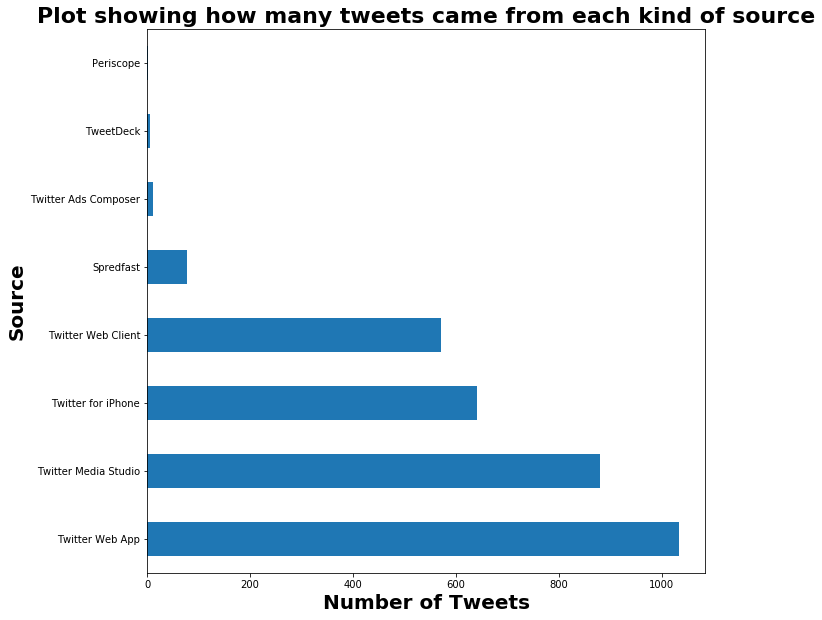

In [138]:
plt.figure(figsize=(10,10))
df_final.Source.value_counts().plot(kind='barh') # creating a horizontal bar plot
plt.xlabel('Number of Tweets', fontsize=20, weight='bold')     # x axis label                                            
plt.ylabel('Source', fontsize=20, weight='bold')               # y axis label                                  
plt.title('Plot showing how many tweets came from each kind of source', fontsize=22, weight='bold')  

## Question 6 

(10 pts) Write a function that removes the URLs (links) and emojis from the tweet text. By running the code that follows this function you should have then "cleanish" text. 

In [139]:
import re

In [140]:
def remove_url(txt):    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    txt = re.sub(emoji_pattern, '', txt)
    txt = re.sub(r'http\S+', '', txt) # removing url
    
    return(txt)

In [141]:
natTweets = [tweet.text for tweet in national_tweets]

In [142]:
natTweets_no_urls = [remove_url(tweet) for tweet in natTweets]

## Question 7 

(10 pts) Write code that will take your list of tweet text `natTweets_no_urls` and creates a list of lists containing the lowercase words for each tweet. 

*Hint: You may want to think about performing the operations on a single tweet text `natTweets_no_urls[0]` - convert it to all lower case, break it into individual words.  Think about String methods https://docs.python.org/3.7/library/stdtypes.html#string-methods* 

*Hint: Once you get the list of words from a single tweet text, collect all the tweets texts in another list.* 

    `[['test',
      'string',
      'text'],
     ['hello',
      'world']]`

In [143]:
natTweets_new = []

In [144]:
for i in natTweets_no_urls:
    natTweets_new.append(i.lower().split(' ')) # splitting of the sentence

In [145]:
natTweets_new[0:5]

[['@inscoebrianna',
  'you',
  'look',
  'like',
  'a',
  'world',
  'champion',
  'third',
  'baseman.',
  ''],
 ['@sotopacheo',
  "you're",
  'darn',
  'right',
  'we',
  'are.',
  '\n\nand',
  "that's",
  '"world',
  'champion',
  'atnationals"',
  'to',
  'you.',
  ''],
 ['juan',
  'soto',
  'hit',
  'the',
  'game-tying',
  'hr',
  'in',
  'game',
  '5',
  'of',
  'the',
  'nlds,',
  'going',
  'back-to-back',
  'w/',
  'rendon.\n\nin',
  'game',
  '7',
  'of',
  'the',
  '#worldseries…',
  ''],
 ['rt',
  '@mlbpipeline:',
  'on',
  'this',
  "week's",
  'pipeline',
  'podcast,',
  '@jimcallismlb,',
  '@jonathanmayo',
  'and',
  '@cespedesbbq',
  'look',
  'back',
  'at',
  'some',
  'of',
  'the',
  "#nats'",
  'postseason…'],
 ['rt', '@victor__robles:', '#newprofilepic', '', '']]

## Question 8 

(10 pts) Write code to take your list of lists of words and count the number of times each word appears. 

You may want to look at using `itertools` to flatten the list. Also, look at the built-in Python library `collections`, which helps create a special type of a Python dictonary. The `collection.Counter` object has a useful built-in method `most_common` that will return the most commonly used words and the number of times that they are used.

In [146]:
from collections import Counter

In [147]:
cnt = Counter()

In [148]:
for i in natTweets_new:
    for word in i:
        cnt[word] += 1 # incrementing of the word count

In [149]:
cnt

Counter({'@inscoebrianna': 1,
         'you': 303,
         'look': 22,
         'like': 46,
         'a': 643,
         'world': 22,
         'champion': 8,
         'third': 21,
         'baseman.': 1,
         '': 3923,
         '@sotopacheo': 1,
         "you're": 31,
         'darn': 1,
         'right': 21,
         'we': 247,
         'are.': 2,
         '\n\nand': 3,
         "that's": 18,
         '"world': 1,
         'atnationals"': 1,
         'to': 773,
         'you.': 24,
         'juan': 125,
         'soto': 154,
         'hit': 110,
         'the': 1578,
         'game-tying': 9,
         'hr': 95,
         'in': 788,
         'game': 185,
         '5': 86,
         'of': 655,
         'nlds,': 2,
         'going': 19,
         'back-to-back': 6,
         'w/': 6,
         'rendon.\n\nin': 1,
         '7': 69,
         '#worldseries…': 1,
         'rt': 533,
         '@mlbpipeline:': 19,
         'on': 242,
         'this': 262,
         "week's": 1,
         'pipelin

In [150]:
common_word = Counter(cnt).most_common(36)
common_word

[('', 3923),
 ('the', 1578),
 ('//', 1149),
 ('in', 788),
 ('to', 773),
 ('of', 655),
 ('a', 643),
 ('rt', 533),
 ('#nats', 531),
 ('is', 426),
 ('and', 411),
 ('for', 398),
 ('you', 303),
 ('#onepursuit', 296),
 ('#stayinthefight', 289),
 ('this', 262),
 ('we', 247),
 ('on', 242),
 ('at', 241),
 ('with', 215),
 ('his', 213),
 ('has', 211),
 ('game', 185),
 ('rendon', 180),
 ('our', 161),
 ('2', 158),
 ('soto', 154),
 ('//…', 150),
 ('anthony', 149),
 ('your', 142),
 ('@mlb', 139),
 ('1', 137),
 ('3', 134),
 ('last', 133),
 ('have', 127),
 ('juan', 125)]

We see we have spaces, some random characters and numbers, so we are getting rid of that and go with the plotting of top 30 words

In [151]:
not_str = ['', '//', '2', '//…', '1', '3'] # defining characters to be removed
common_word_new = [x for x in common_word if x[0] not in not_str]

Top 30 words

In [152]:
common_word_new

[('the', 1578),
 ('in', 788),
 ('to', 773),
 ('of', 655),
 ('a', 643),
 ('rt', 533),
 ('#nats', 531),
 ('is', 426),
 ('and', 411),
 ('for', 398),
 ('you', 303),
 ('#onepursuit', 296),
 ('#stayinthefight', 289),
 ('this', 262),
 ('we', 247),
 ('on', 242),
 ('at', 241),
 ('with', 215),
 ('his', 213),
 ('has', 211),
 ('game', 185),
 ('rendon', 180),
 ('our', 161),
 ('soto', 154),
 ('anthony', 149),
 ('your', 142),
 ('@mlb', 139),
 ('last', 133),
 ('have', 127),
 ('juan', 125)]

## Question 9 

(5 pts) Plot the top 30 most frequently used words with their word counts.  

*You may want to import the information from above into a Dataframe and use your normal plotting tools*

In [153]:
df_frequent_words = pd.DataFrame(columns = ['Word', 'Count'])

for i in common_word_new:
    df_frequent_words = df_frequent_words.append({'Word': i[0], 'Count': i[1]}, ignore_index=True)

In [154]:
df_frequent_words

,Word,Count
0,the,1578
1,in,788
2,to,773
3,of,655
4,a,643
5,rt,533
6,#nats,531
7,is,426
8,and,411
9,for,398


In [155]:
words=[]
lis1=[]
for i in range(0, len(df_frequent_words)):
    lis1.append(df_frequent_words.iloc[i][0])
    word_now = lis1*df_frequent_words.iloc[i][1]
    words.append(word_now)
    lis1=[]

In [156]:
words_final = []
extend = words_final.extend
for i in words:
    extend(i)

Text(0.5, 1.0, 'Top 30 most frequently used words')

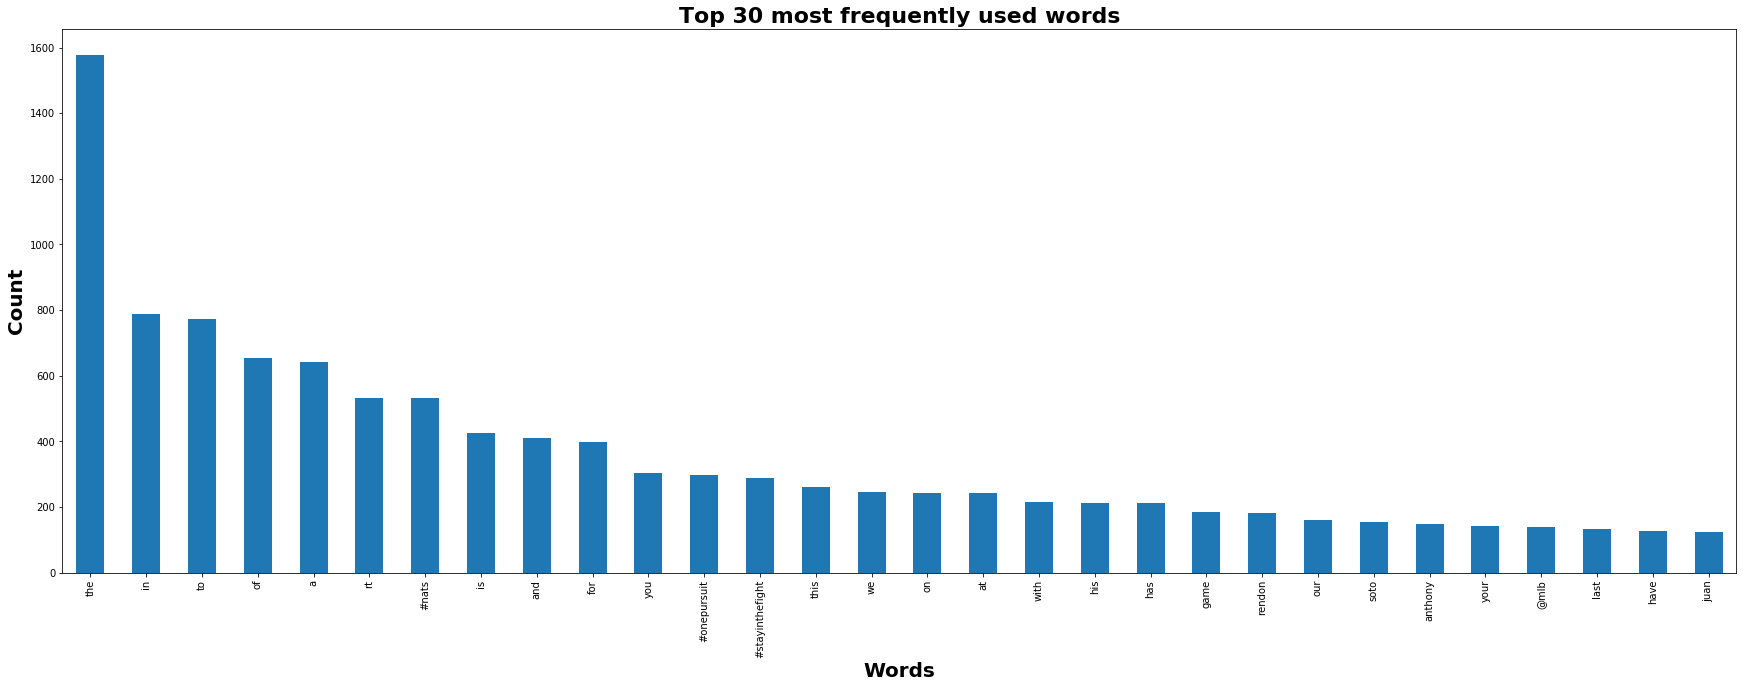

In [157]:
plt.figure(figsize=(30,10))
pd.Series(words_final).value_counts().plot('bar')
plt.xlabel('Words', fontsize=20, weight='bold')  # x axis label                                               
plt.ylabel('Count', fontsize=20, weight='bold')   # y axis label                                              
plt.title('Top 30 most frequently used words', fontsize=22, weight='bold')  

## Bonus 

(5 pts) You may see a number of very common words as the most common, e.g., the, in, to, of, etc.  You may want to remove those common words, these are typically referred to as "stop words" in the text analysis communities. 

The python package `nltk` is used for text analysis.  It provides a list of "stop words".  Re-analyze the tweet text by removing stop words from consideration, and plot the 30 most popular words with their frequencies. 



In [158]:
common_word = Counter(cnt).most_common(100)

In [159]:
not_str = ['', '//', '2', '//…', '1', '3', '4', '0', '...', '5', '6', '-', '8', '7', '2019', '5,']
common_word_new = [x for x in common_word if x[0] not in not_str]

In [160]:
common_word_new

[('the', 1578),
 ('in', 788),
 ('to', 773),
 ('of', 655),
 ('a', 643),
 ('rt', 533),
 ('#nats', 531),
 ('is', 426),
 ('and', 411),
 ('for', 398),
 ('you', 303),
 ('#onepursuit', 296),
 ('#stayinthefight', 289),
 ('this', 262),
 ('we', 247),
 ('on', 242),
 ('at', 241),
 ('with', 215),
 ('his', 213),
 ('has', 211),
 ('game', 185),
 ('rendon', 180),
 ('our', 161),
 ('soto', 154),
 ('anthony', 149),
 ('your', 142),
 ('@mlb', 139),
 ('last', 133),
 ('have', 127),
 ('juan', 125),
 ('from', 123),
 ('it', 116),
 ('are', 115),
 ('nationals', 111),
 ('hit', 110),
 ('just', 109),
 ('max', 106),
 ('nats', 103),
 ('@natsparkservice:', 103),
 ('washington', 99),
 ('hr', 95),
 ('that', 95),
 ('turner', 95),
 ('@nationals', 94),
 ('since', 94),
 ('all', 93),
 ('trea', 93),
 ('best', 91),
 ('rbi', 91),
 ('an', 90),
 ('park', 89),
 ('up', 88),
 ('been', 86),
 ('baseball', 82),
 ('first', 82),
 ('time', 80),
 ('career', 79),
 ('more', 78),
 ('was', 77),
 ('out', 76),
 ('team', 74),
 ('eaton', 74),
 ('sch

In [161]:
from nltk.corpus import stopwords 

In [162]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dolia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [163]:
stop_words = set(stopwords.words('english')) 
word_tokens = []

for i in range(0,len(common_word_new)):
    word_tokens.append(common_word_new[i][0])
    
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = filtered_sentence[:30]

In [164]:
common_word_filtered = [x for x in common_word_new if x[0] in filtered_sentence]

In [165]:
df_filtered_words = pd.DataFrame(columns = ['Word', 'Count'])

for i in common_word_filtered:
    df_filtered_words = df_frequent_words.append({'Word': i[0], 'Count': i[1]}, ignore_index=True)

In [167]:
df_filtered_words

,Word,Count
0,the,1578
1,in,788
2,to,773
3,of,655
4,a,643
5,rt,533
6,#nats,531
7,is,426
8,and,411
9,for,398


In [168]:
words=[]
lis1=[]
for i in range(0, len(df_filtered_words)):
    lis1.append(df_filtered_words.iloc[i][0])
    word_now = lis1*df_filtered_words.iloc[i][1]
    words.append(word_now)
    lis1=[]

In [169]:
words_final = []
extend = words_final.extend
for i in words:
    extend(i)

Text(0.5, 1.0, 'Top 30 most frequently used words')

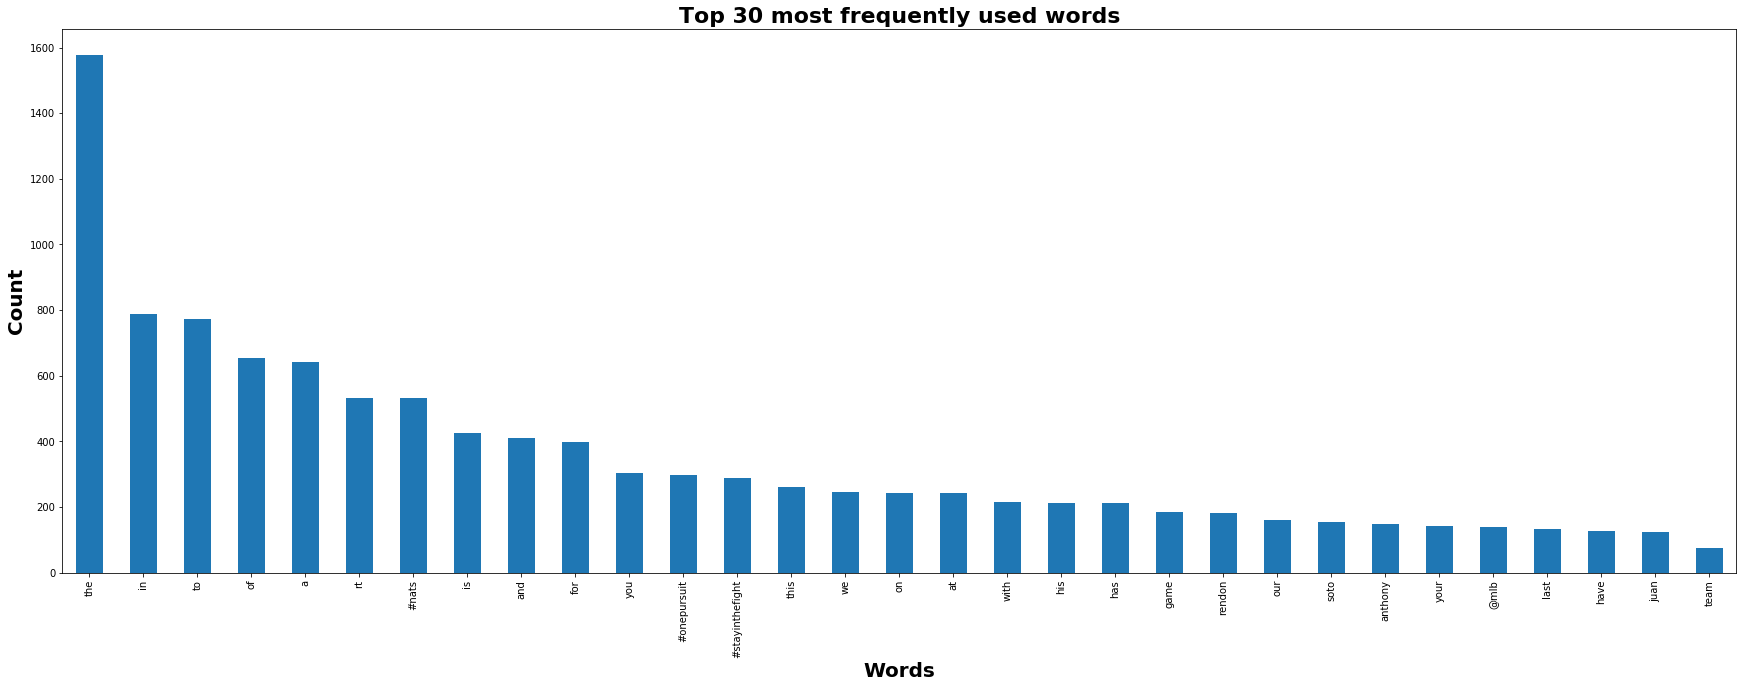

In [170]:
plt.figure(figsize=(30,10))
pd.Series(words_final).value_counts().plot('bar')
plt.xlabel('Words', fontsize=20, weight='bold')                                                 
plt.ylabel('Count', fontsize=20, weight='bold')                                                 
plt.title('Top 30 most frequently used words', fontsize=22, weight='bold')  